In [1]:
import numpy as np
import pandas as pd
import os

from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [2]:
train_df = pd.read_csv("../data/titanic/input/train.csv")
test_df = pd.read_csv("../data/titanic/input/test.csv")

In [5]:
train_df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q


In [3]:
# 임시로 결측 처리
train_df['Embarked'].fillna(train_df['Embarked'].mode(), inplace=True)
train_df['Age'].fillna(0, inplace=True)

# Table
- Scale 후 분포 비교
- Normalize 후 분포 비교
- Histogram
- Count Plot
- Bar Plot (Count Plot)
- Density Plot
- Box-Plot(Outlier)
- Cross Tab
- Scatter Plot

### Scailing
: 데이터의 range를 변경 (0~1까지)  
  사용이유: 데이터 point간의 거리를 측정할 때 scale 필요 (예: SVM, KNN)  
  예) 1달러 <-> 1원, 키 <-> 몸무게   
    
### Normalization
: 데이터의 분포를 변경(정규화: 평균=중앙값, normal distribution = gaussian distribution)  
  사용이유: 정규화를 기본 가정으로 갖는 기법에서 이용. (제곱근, 로그화)    
  예) t-test, anova, linear regression, linear discriminant analysis, gaussian naive bayes.

## Scale 후 분포 비교

In [21]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [55]:
age = train_df[['Age']][train_df['Age']>0]
print(age.shape)

scaler = StandardScaler()
scaler.fit(age)
scaled_age = scaler.transform(age)
print(np.mean(scaled_age), np.std(scaled_age))

# scaler2 = RobustScaler()
# scaler2.fit(age)
# scaler2 = scaler2.transform(age)
# print(np.mean(scaler2), np.std(scaler2))

(714, 1)
2.338621049070358e-16 1.0
0.09505553270259151 0.8121018825632065


Text(0.5, 1.0, 'Scaled Age')

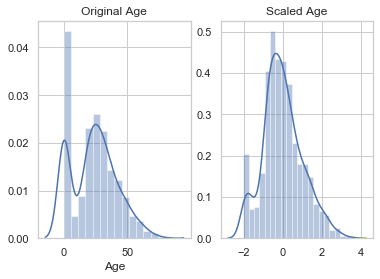

In [56]:
fig, ax = plt.subplots(1,2)
sns.distplot(train_df['Age'], ax=ax[0])
ax[0].set_title('Original Age')
sns.distplot(scaled_age, ax=ax[1])
ax[1].set_title('Scaled Age')
# sns.distplot(scaler2, ax=ax[2])
# ax[2].set_title('Scaled2 Age')

In [10]:
? StandardScaler

## Normalize 후 분포 비교

In [37]:
from scipy import stats

In [57]:
positive_pledges = train_df['Age'][train_df['Age'] > 0] # box-cox 가 양수만 취급

In [58]:
normalized_pledges = stats.boxcox(positive_pledges)[0]

Text(0.5, 1.0, 'Normalized Data')

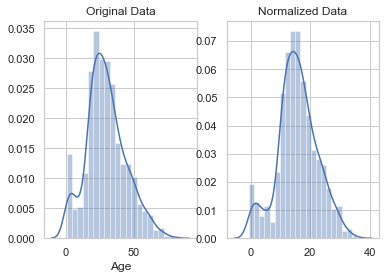

In [59]:
fig, ax = plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized Data")

In [63]:
# Fare

In [60]:
positive_pledges = train_df['Fare'][train_df['Fare'] > 0] # box-cox 가 양수만 취급

In [61]:
normalized_pledges = stats.boxcox(positive_pledges)[0]

Text(0.5, 1.0, 'Normalized Data')

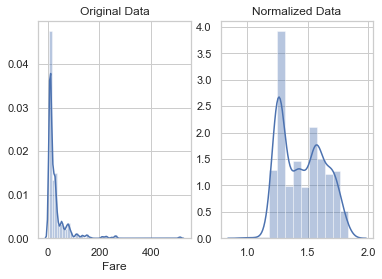

In [62]:
fig, ax = plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized Data")

In [107]:
df.sample(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9810,3797000400,20141125T000000,616500.0,4,2.25,1880,3000,2.0,0,0,...,8,1760,120,1909,1977,98103,47.6864,-122.349,1880,3000


In [111]:
from scipy.stats import norm, skew #for some statistics


 mu = 540088.14 and sigma = 367118.70



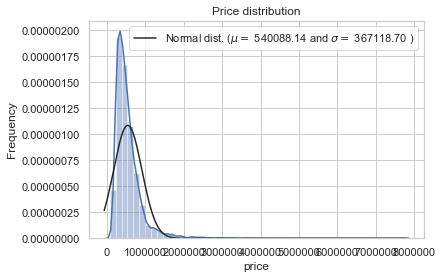

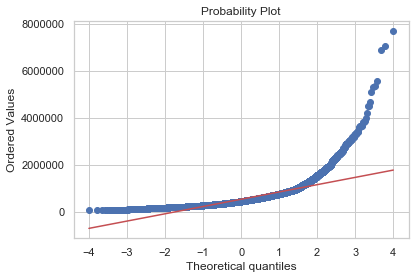

In [112]:
sns.distplot(df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'] )
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'] , plot=plt)
plt.show()


 mu = 13.05 and sigma = 0.53



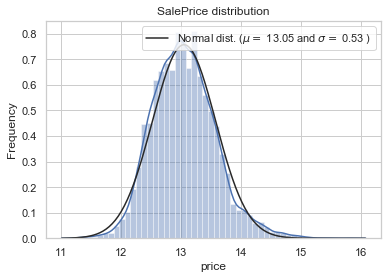

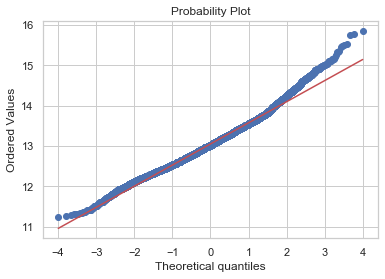

In [113]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df['price'] = np.log1p(df['price'])

#Check the new distribution 
sns.distplot(df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

## Histogram

In [66]:
train_df = pd.read_csv("../data/titanic/input/train.csv")
# test_df = pd.read_csv("../data/titanic/input/test.csv")

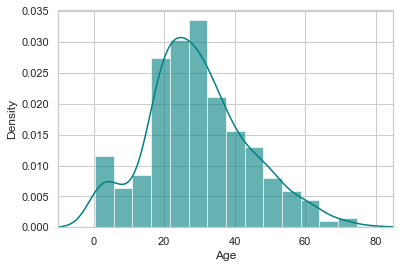

In [67]:
# histogram
ax = train_df['Age'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df['Age'].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10, 85)
plt.show()

In [126]:
train_df['Age_imputed'] = train_df['Age'].fillna(train_df['Age'].mean()) 

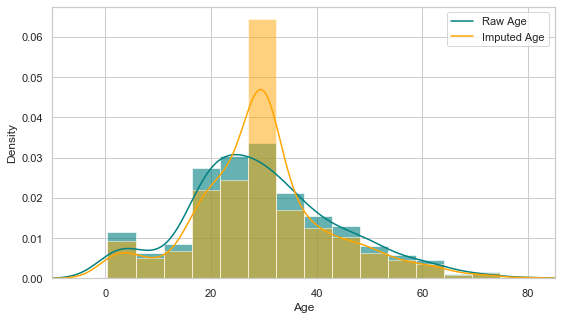

In [129]:
plt.figure(figsize=(9,5))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_df["Age_imputed"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_df["Age_imputed"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Imputed Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [92]:
train_df = pd.read_csv("../data/titanic/input/train.csv")

In [93]:
col = set(train_df.columns) - set(['PassengerId','Survived'])

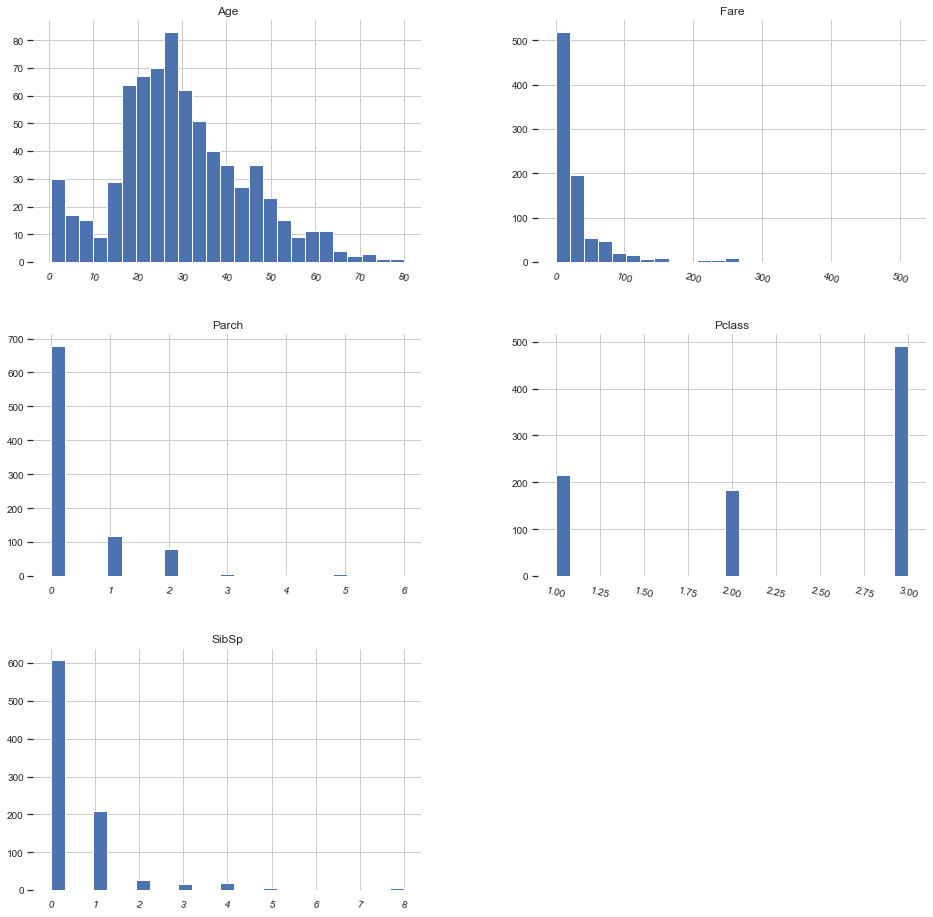

In [95]:
df1 = train_df[col]

h = df1.hist(bins=25, figsize=(16,16),
            xlabelsize='10', ylabelsize='10', xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

## Count Plot

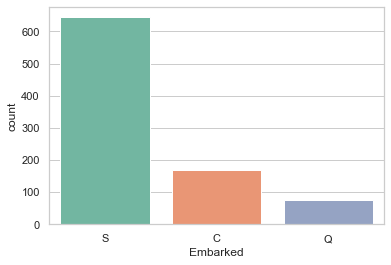

In [69]:
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

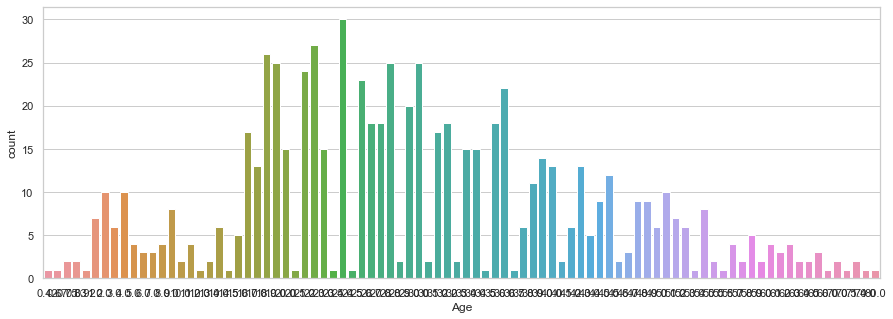

In [104]:
f, axe = plt.subplots(figsize=(15,5))
p1 = sns.countplot(train_df['Age'], ax=axe)

## Bar Plot

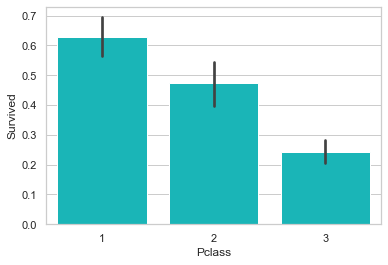

In [77]:
sns.barplot('Pclass', 'Survived', data=train_df, color='darkturquoise')
plt.show()

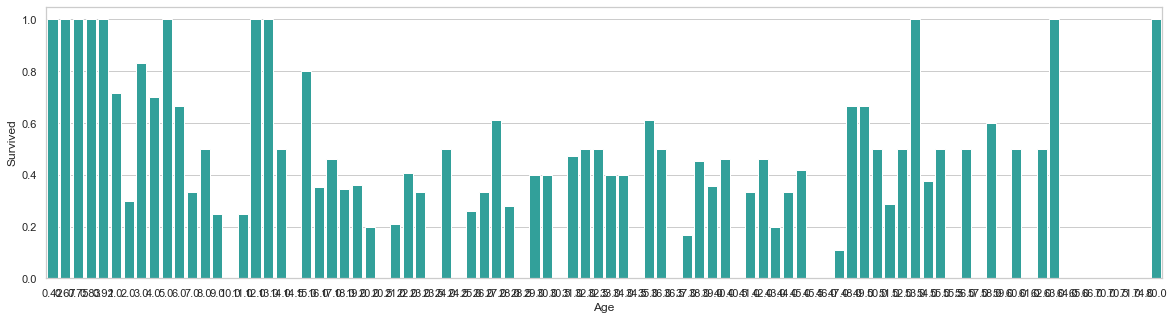

In [124]:
plt.figure(figsize=(20,5))
avg_survival_byage = train_df[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data = avg_survival_byage, color='LightSeaGreen')
plt.show()

## Density Plot

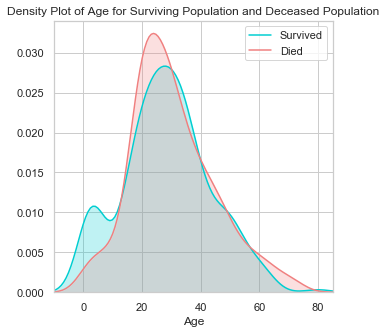

In [123]:
plt.figure(figsize=(5,5))
ax = sns.kdeplot(train_df['Age'][train_df['Survived']==1], color='darkturquoise', shade=True)
sns.kdeplot(train_df['Age'][train_df['Survived']==0], color='lightcoral', shade=True) # shade: 그래프 내에 색 칠해짐
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10, 85)
plt.show()

## Correlation Plot

In [79]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_imputed'],
      dtype='object')

In [83]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [86]:
from pandas import get_dummies
train_df = pd.get_dummies(train_df, columns=["Pclass", "Embarked", "Sex"], drop_first=True )

In [87]:
train_df.sample(1)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_imputed,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
878,879,0,"Laleff, Mr. Kristo",NaN,0,0,349217,7.8958,NaN,29.699118,0,1,0,1,1


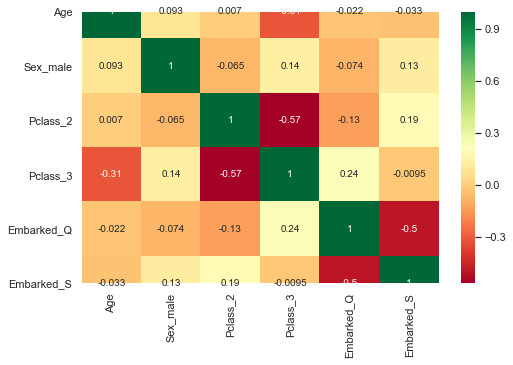

In [88]:
# 선택된 변수들간의 상관관계 파악
Selected_features = ['Age', 'Sex_male', 'Pclass_2','Pclass_3', 'Embarked_Q', 'Embarked_S']
x = train_df[Selected_features]

plt.subplots(figsize=(8,5))
sns.heatmap(x.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [97]:
df = pd.read_csv('../data/housesalesprediction/input/kc_house_data.csv')

In [98]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [99]:
mask = np.zeros_like(df[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

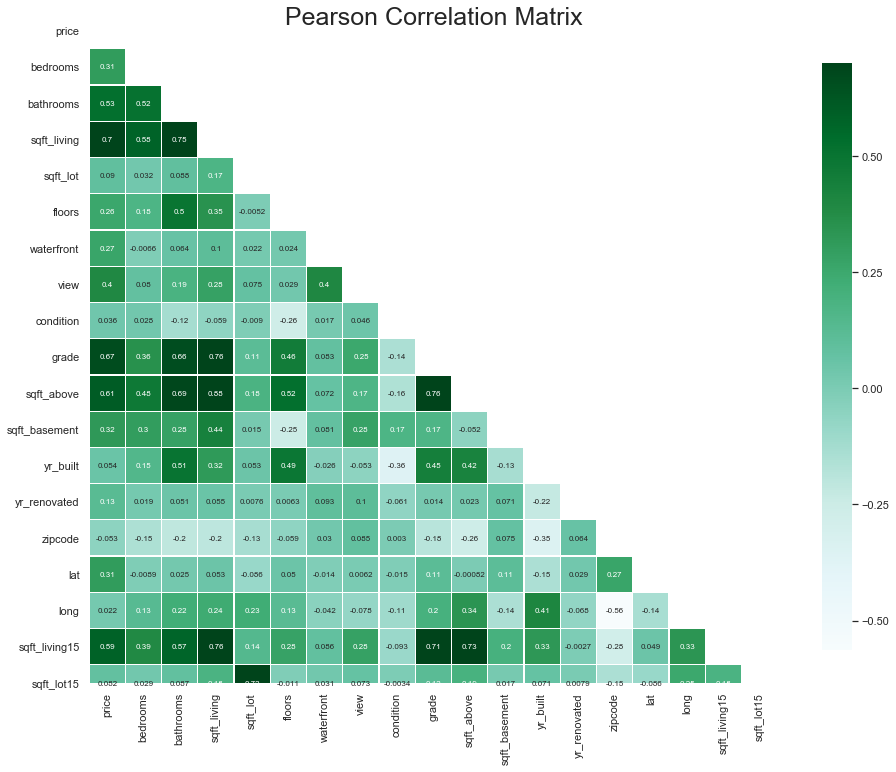

In [100]:
f, ax = plt.subplots(figsize= (16,12))
plt.title('Pearson Correlation Matrix', fontsize=25)
sns.heatmap(df[features].corr(), 
            linewidths=0.25, vmax=0.7, square= True,
           cmap='BuGn', linecolor='w', annot=True, annot_kws={'size':8},
           mask = mask, cbar_kws={'shrink':.9})

# cbark_kws : 오른쪽 축 크기
# mask : 대칭이니까 지우기

## Box-Plot (Outlier)

In [101]:
sns.set(style='whitegrid', font_scale=1)

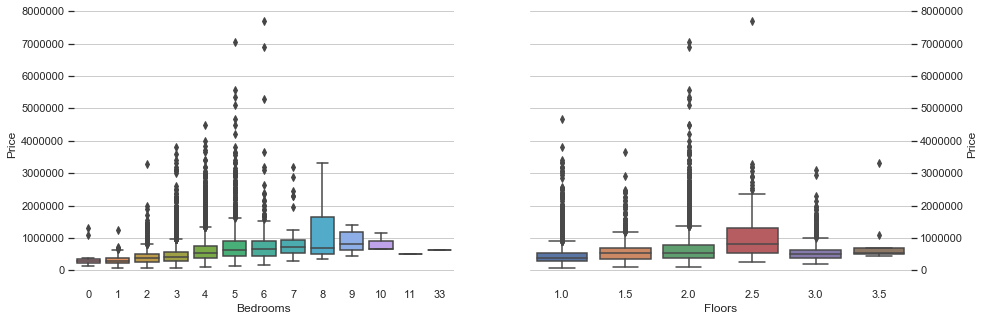

In [102]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x=df['bedrooms'], y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'], y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)

axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()

axes[1].set(xlabel='Floors', ylabel='Price')
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()

In [117]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [119]:
df.sample(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
780,7230200340,20150225T000000,305000.0,3,1.0,1250,23680,1.0,0,0,...,7,1250,0,1967,0,98059,47.4750,-122.110,1450,23680
20378,1853080840,20150211T000000,889950.0,5,3.5,3700,7055,2.0,0,0,...,9,3700,0,2014,0,98074,47.5929,-122.057,3170,6527


In [118]:
# df = pd.read_csv('../data/housesalesprediction/input/kc_house_data.csv')

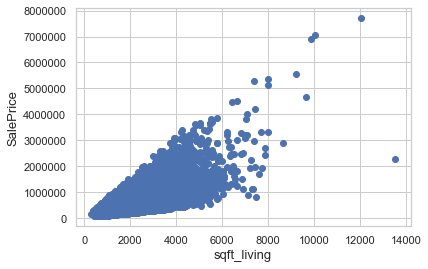

In [121]:
fig, ax = plt.subplots()
ax.scatter(x = df['sqft_living'], y = df['price'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('sqft_living', fontsize=13)
plt.show()

# FaceGrid

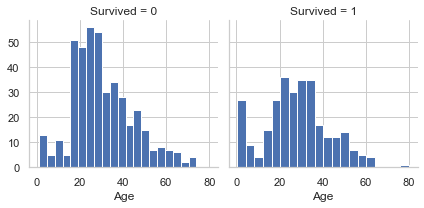

In [4]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

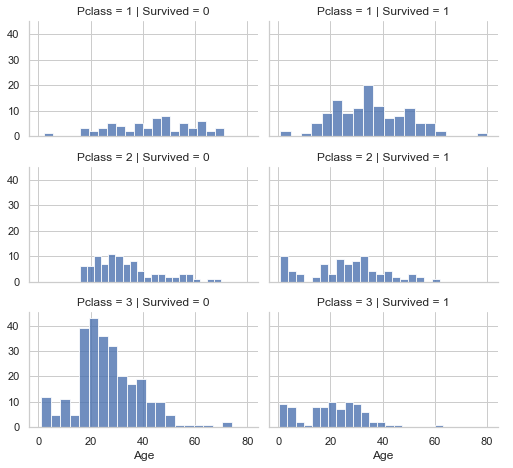

In [7]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.8, bins=20)
grid.add_legend();

# Cross tab

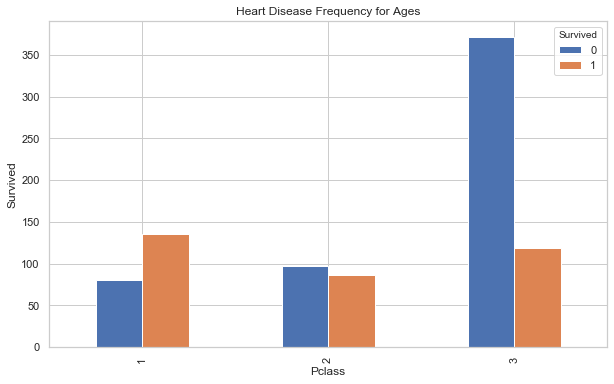

In [7]:
pd.crosstab(train_df['Pclass'],train_df['Survived']).plot(kind="bar",figsize=(10,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Pclass')
plt.ylabel('Survived')
# plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Scatter Plot

In [11]:
# df = train_df.copy()

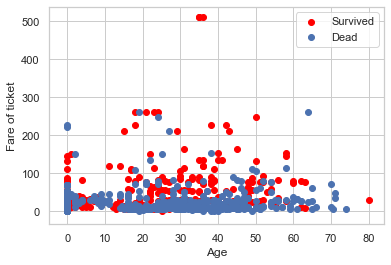

In [16]:
plt.scatter(x=df.Age[df.Survived==1], y=df.Fare[(df.Survived==1)], c="red")
plt.scatter(x=df.Age[df.Survived==0], y=df.Fare[(df.Survived==0)])
plt.legend(["Survived", "Dead"])
plt.xlabel("Age")
plt.ylabel("Fare of ticket")
plt.show()